# Analysis of domestic flight delays
## by Manuel Mane

## Preliminary Wrangling

This dataset describe the airline arrival on-time performance of domestic flights operated by large air carriers tracked by the U.S. Department of Transportation's (DOS) Bureay of Transportation Statistics of the United States Department of Transportation from June 2003 to July 2020. It presents summary information on the number of on-time, delayed, canceled and diversed flights, about 30 days after the each month ends.

The dataset can be found in the [Bureau of Transportation Statistics website](https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp)

### Variable Description

**Year:**	Years (1987-2008)

**Month:**	Months of the year (1-12)

**Carrier:** Carrier code

**Carrier Name**

**Airport:** Airport Code

**Airport Name**

**arr_flights:** Number of flights that arrived

**arr_del15:** Number of flights with arrival delay. A flight is considered delayed when it arrives more than 15 minutes after its published arrival time.

**arr_canceled:** Number of arrival flights canceled

**arr_diverted**: FLights diverted

**ArrDelay:**	Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers.

**CarrierDelay:**	Minutes of delays due to circumstances within the airline's control (e.g. maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc.).

**WeatherDelay:**	Delays (in minutes) due to significant meteorological conditions (actual or forecasted) that, in the judgment of the carrier, provoked to delay or the prevention of the operation of a flight such as tornado, blizzard or hurricane.

**NASDelay:**	National Air System Delay, in Minutes. Delays and cancellations attributable to the national aviation system that refer to a broad set of conditions, such as non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control.

**SecurityDelay:** 	Security Delay, in Minutes. Delays caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.

**LateAircraftDelay:**	Late Aircraft Delay, in Minutes. A previous flight with same aircraft arrived late, causing the present flight to depart late.



In [1]:
# importing all packages and setting plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [35]:
# Visualizing the data. Showing all the columns
pd.set_option('display.max_columns', None)
data = pd.read_csv('airline_delay_causes.csv')
data.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
0,2004,1,DL,Delta Air Lines Inc.,PBI,"West Palm Beach/Palm Beach, FL: Palm Beach Int...",650.0,126.0,21.06,6.44,51.58,1.0,45.92,4.0,0.0,5425.0,881.0,397.0,2016.0,15.0,2116.0,NaN
1,2004,1,DL,Delta Air Lines Inc.,PDX,"Portland, OR: Portland International",314.0,61.0,14.09,2.61,34.25,0.0,10.05,30.0,3.0,2801.0,478.0,239.0,1365.0,0.0,719.0,NaN
2,2004,1,DL,Delta Air Lines Inc.,PHL,"Philadelphia, PA: Philadelphia International",513.0,97.0,27.60,0.42,51.86,0.0,17.12,15.0,0.0,4261.0,1150.0,16.0,2286.0,0.0,809.0,NaN
3,2004,1,DL,Delta Air Lines Inc.,PHX,"Phoenix, AZ: Phoenix Sky Harbor International",334.0,78.0,20.14,2.02,39.39,0.0,16.45,3.0,1.0,3400.0,1159.0,166.0,1295.0,0.0,780.0,NaN
4,2004,1,DL,Delta Air Lines Inc.,PIT,"Pittsburgh, PA: Pittsburgh International",217.0,47.0,8.08,0.44,21.89,0.0,16.59,4.0,1.0,1737.0,350.0,28.0,522.0,0.0,837.0,NaN


In [3]:
# Description of the columns
data.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
count,285159.000000,285159.000000,284739.000000,284515.000000,284739.000000,284739.000000,284739.000000,284739.000000,284739.000000,284739.000000,284739.000000,284739.000000,284739.000000,284739.000000,284739.000000,284739.000000,284739.000000,0.0
mean,2011.429869,6.477144,391.979357,75.901671,21.315395,2.699774,25.431370,0.174975,26.220507,7.419321,0.895181,4343.976357,1285.063226,223.726697,1167.605972,6.924875,1660.654905,NaN
std,5.091180,3.437687,1047.188412,204.554402,47.193903,10.237590,88.647139,0.831884,77.576442,38.301913,4.010714,12785.570150,3428.748282,866.441724,4843.929590,37.051409,5039.116793,NaN
min,2003.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-19.000000,0.000000,0.000000,NaN
25%,2007.000000,4.000000,60.000000,10.000000,3.330000,0.000000,2.000000,0.000000,1.910000,0.000000,0.000000,479.000000,162.000000,0.000000,66.000000,0.000000,92.000000,NaN
50%,2011.000000,6.000000,124.000000,24.000000,8.680000,0.640000,6.010000,0.000000,6.430000,1.000000,0.000000,1278.000000,457.000000,28.000000,223.000000,0.000000,385.000000,NaN
75%,2016.000000,9.000000,280.000000,58.000000,20.170000,2.100000,16.350000,0.000000,18.080000,4.000000,1.000000,3199.000000,1120.000000,165.000000,641.000000,0.000000,1172.000000,NaN
max,2020.000000,12.000000,21977.000000,6377.000000,1792.070000,717.940000,4091.270000,80.560000,1885.470000,4951.000000,256.000000,433687.000000,196944.000000,57707.000000,238440.000000,3194.000000,148181.000000,NaN


In [4]:
# Data type of the variables
data.dtypes

year                     int64
 month                   int64
carrier                 object
carrier_name            object
airport                 object
airport_name            object
arr_flights            float64
arr_del15              float64
carrier_ct             float64
 weather_ct            float64
nas_ct                 float64
security_ct            float64
late_aircraft_ct       float64
arr_cancelled          float64
arr_diverted           float64
 arr_delay             float64
 carrier_delay         float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
Unnamed: 21            float64
dtype: object

In [7]:
# Shape of my data
data.shape

(285159, 22)

In [36]:
# Dropping columns that I will not use in my analysis. Making the dataset smaller and consize
columns = ['carrier_ct', ' weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct', 'Unnamed: 21']
data.drop(columns=columns, axis=1, inplace=True)
data.columns

Index(['year', ' month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'arr_cancelled', 'arr_diverted',
       ' arr_delay', ' carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [37]:
# Fixing some typos on the name of the columns.
data.rename(columns = {' month': 'month', ' arr_delay':'arr_delay', ' carrier_delay':'carrier_delay'}, inplace=True)


#### Missing data

In [30]:
no_data = data[data.arr_flights.isna()]
no_data

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
1418,2004,2,EV,Atlantic Southeast Airlines,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1427,2004,2,EV,Atlantic Southeast Airlines,BNA,"Nashville, TN: Nashville International",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2183,2004,2,TZ,ATA Airlines d/b/a ATA,TPA,"Tampa, FL: Tampa International",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2804,2004,3,EV,Atlantic Southeast Airlines,BNA,"Nashville, TN: Nashville International",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2810,2004,3,EV,Atlantic Southeast Airlines,CAK,"Akron, OH: Akron-Canton Regional",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280232,2018,10,OO,SkyWest Airlines Inc.,EWN,"New Bern/Morehead/Beaufort, NC: Coastal Caroli...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
280241,2018,10,OO,SkyWest Airlines Inc.,FSM,"Fort Smith, AR: Fort Smith Regional",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
280297,2018,10,OO,SkyWest Airlines Inc.,MFE,"Mission/McAllen/Edinburg, TX: McAllen Miller I...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283051,2018,12,EV,ExpressJet Airlines Inc.,LNK,"Lincoln, NE: Lincoln Airport",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
data.isna().sum()

year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            420
arr_del15              644
arr_cancelled          420
arr_diverted           420
arr_delay              420
carrier_delay          420
weather_delay          420
nas_delay              420
security_delay         420
late_aircraft_delay    420
dtype: int64

We can notice that the variable that more missing data has is arr_del15 with 644. Out of 285159, this value does not seem that it could have an effect in the insights I could get from the analysis of this data if I drop them. So, I will proceed to do so.

#### Dropping missing data

In [38]:
data.dropna(inplace=True)
data.shape

(284515, 16)

#### Checking unique values

In [43]:
# There are 408 different airports
data.airport.value_counts()

DTW    2737
LAX    2737
LAS    2721
MCI    2678
DCA    2674
       ... 
CBM       1
FNL       1
YNG       1
SKA       1
RCA       1
Name: airport, Length: 408, dtype: int64

In [45]:
data.month.value_counts()

6     25033
7     24831
1     23873
3     23674
2     23601
8     23571
4     23512
12    23510
9     23367
5     23327
11    23169
10    23047
Name: month, dtype: int64

In [46]:
data.year.value_counts()

2019    20927
2018    20211
2007    19485
2008    18885
2006    18062
2009    17637
2010    17554
2005    17006
2004    16689
2013    16068
2011    15567
2012    14366
2014    13957
2015    13513
2017    12503
2016    12195
2020    11133
2003     8757
Name: year, dtype: int64

#### Fixing data types

In [51]:
data.astype({'year': 'category', 'month': 'category', 'carrier':'category', 'airport':'category', 'arr_flights':'int32','arr_del15':'int32', 'arr_cancelled':'int32', 'arr_delay':'int32', 'arr_diverted':'int32'}).dtypes

year                   category
month                  category
carrier                category
carrier_name             object
airport                category
airport_name             object
arr_flights               int32
arr_del15                 int32
arr_cancelled             int32
arr_diverted              int32
arr_delay                 int32
carrier_delay           float64
weather_delay           float64
nas_delay               float64
security_delay          float64
late_aircraft_delay     float64
dtype: object

## Insights so far:

### Structure of your dataset.

My dataset contains 285 159 rows (observations), and 22 columns (variables). Most variables are numeric, some of them such as Year and Month were asigned to be categorical. Others such as arr_glfights and arr_del15 were set as integer types. 

### Main feature(s) of interest in the dataset

The main features of interest are the time of delay of the flights (difference between the fligh departure time and the time the fligh actually departured) and the variables that describes the types of delays per month or per carrier. 

###  Features that will support my investigation

The features that can help me support my investidation are month, year, carrier, airport, arr_delay and the different features that describe the different types of delays.

## Univariate Exploration

> In this section, I investigate distributions of individual variables. 

I will start by looking at the distribution of the main variable arr_delay that describe the amount of minutes of delays

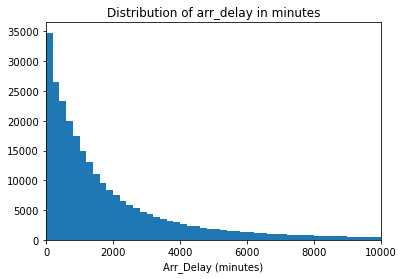

In [63]:
bins = np.arange(0, max(data.arr_delay), 200)
plt.hist(data.arr_delay, bins = bins, color=sb.color_palette()[0])
plt.xlim(0,10000)
plt.title("Distribution of arr_delay in minutes")
plt.xlabel("Arr_Delay (minutes)");

**The distribution is right skewed with a long tail in the right. I will scale it to log to see what happens**

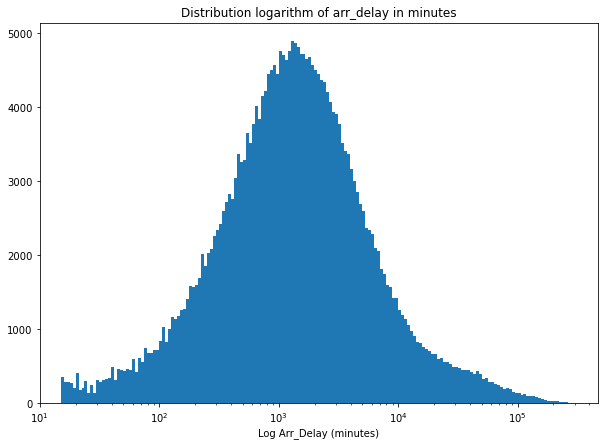

In [73]:
binsize=0.025
plt.figure(figsize=(10,7))
bins = 10**np.arange(0.025, np.log10(max(data.arr_delay))+binsize, binsize)
plt.hist(data.arr_delay, bins = bins, color=sb.color_palette()[0])
plt.xlim(xmin=10)
plt.xscale('log')
#plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.title("Distribution logarithm of arr_delay in minutes")
plt.xlabel("Log Arr_Delay (minutes)");

**Using a logarithm scale, the distribution of the time delay looks like a normal unimodal distribution.**

**I am going to plot the other dealy variables to compare them.**

In [108]:
data.carrier_delay.max()

196944.0

In [147]:
def univariate(columns):
    """
    This function plots the distribution and logarithmic distribution of the input variable columns of the 
    data dataframe.
    
    Inputs:
    columns=> column of the data for the distribution
   
    Return:
    Histogram plot and Logarithm plot
    """
    
    
    plt.figure(figsize=(40,40))
    count = 0
    for index, column in enumerate(columns):
        bins = np.arange(0,max(data[column]), 10)
        log_bins = 10**np.arange(0.025, np.log10(max(data[column]))+0.025, 0.025)
        count+=1
        plt.subplot(len(columns), 2, count)

        plt.subplot(len(columns), 2, count)
        plt.hist(data[column], bins = bins, color=sb.color_palette()[0])
        plt.title(f"Distribution of {column}")
        plt.xlabel(f"{column} (minutes)")
        plt.xlim(0, int(data[column].max()/100))
        
        count+=1
            
        plt.subplot(len(columns), 2, count)
        plt.hist(data[column], bins = log_bins, color=sb.color_palette()[0])
        plt.xscale('log')
        plt.title(f"Distribution logarithm of {column}")
        plt.xlabel(f"Log {column}")
        ;

<ipython-input-147-de0ed1f5f062>:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(len(columns), 2, count)


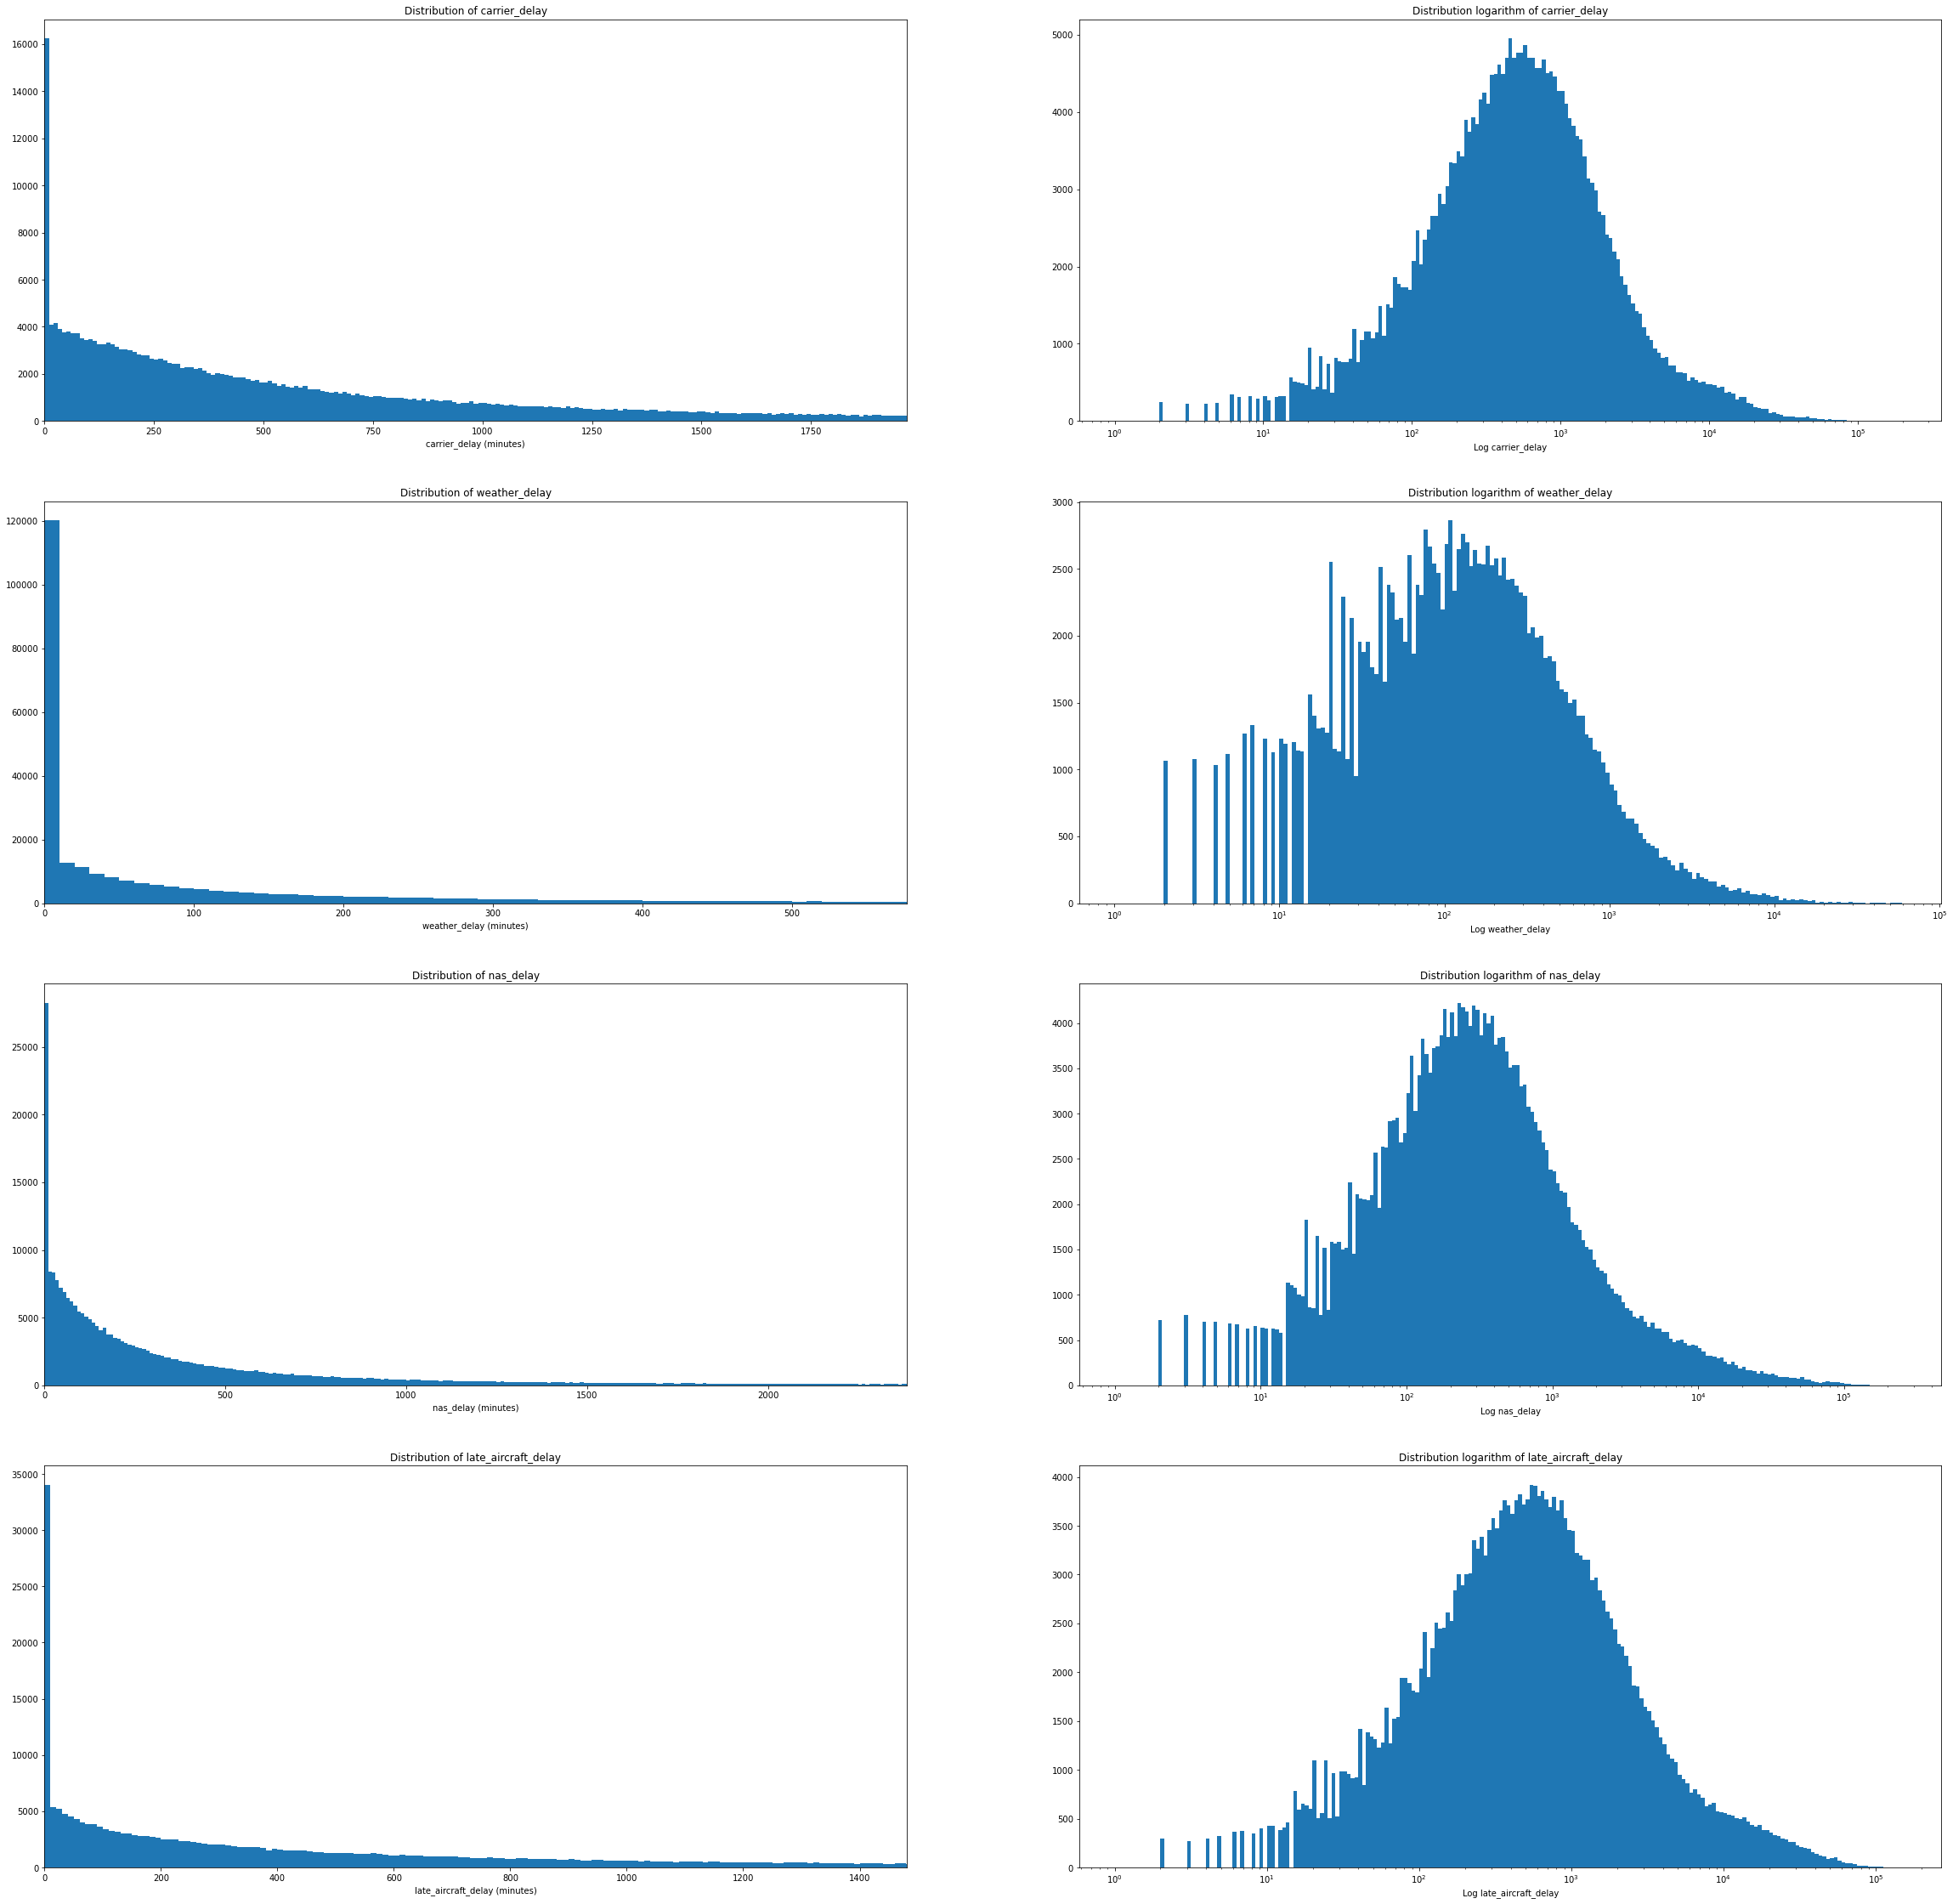

In [148]:
columns = ['carrier_delay', 'weather_delay', 'nas_delay', 'late_aircraft_delay']
univariate(columns)

#### Insights

All the delay variables have a similar right skewed distribution with a long tail. In the logarithmic scale they all present some peaks between 100 and 1000. With this visualizations, I can notice there are some outliers in the time data which we can dig deeper if there is something in common with these outliers in the delays.

In [189]:
def cat_univariate(columns):
    """
    This function applies the seaborn countplot function onto the passed columns. In summary, it 
    is built in order to plot cumulative function on categorical variables.
    """

    fig, ax = plt.subplots(nrows=len(columns), figsize = [40,40])

    

    
    
    for index,column in enumerate(columns):
        default_color = sb.color_palette()[0]
        sb.countplot(data = data, x = column, color = default_color, ax = ax[index])

        ax[index].set_xlabel(f"{column}", fontsize=40)
        ax[index].set_title(f"Histogram of {column}", fontsize=40)
        ax[index].xaxis.set_tick_params(labelsize=30)
        ax[index].yaxis.set_tick_params(labelsize=30)


**Plotting our categorical variables**

In [163]:
columns = ['carrier', 'year', 'month']

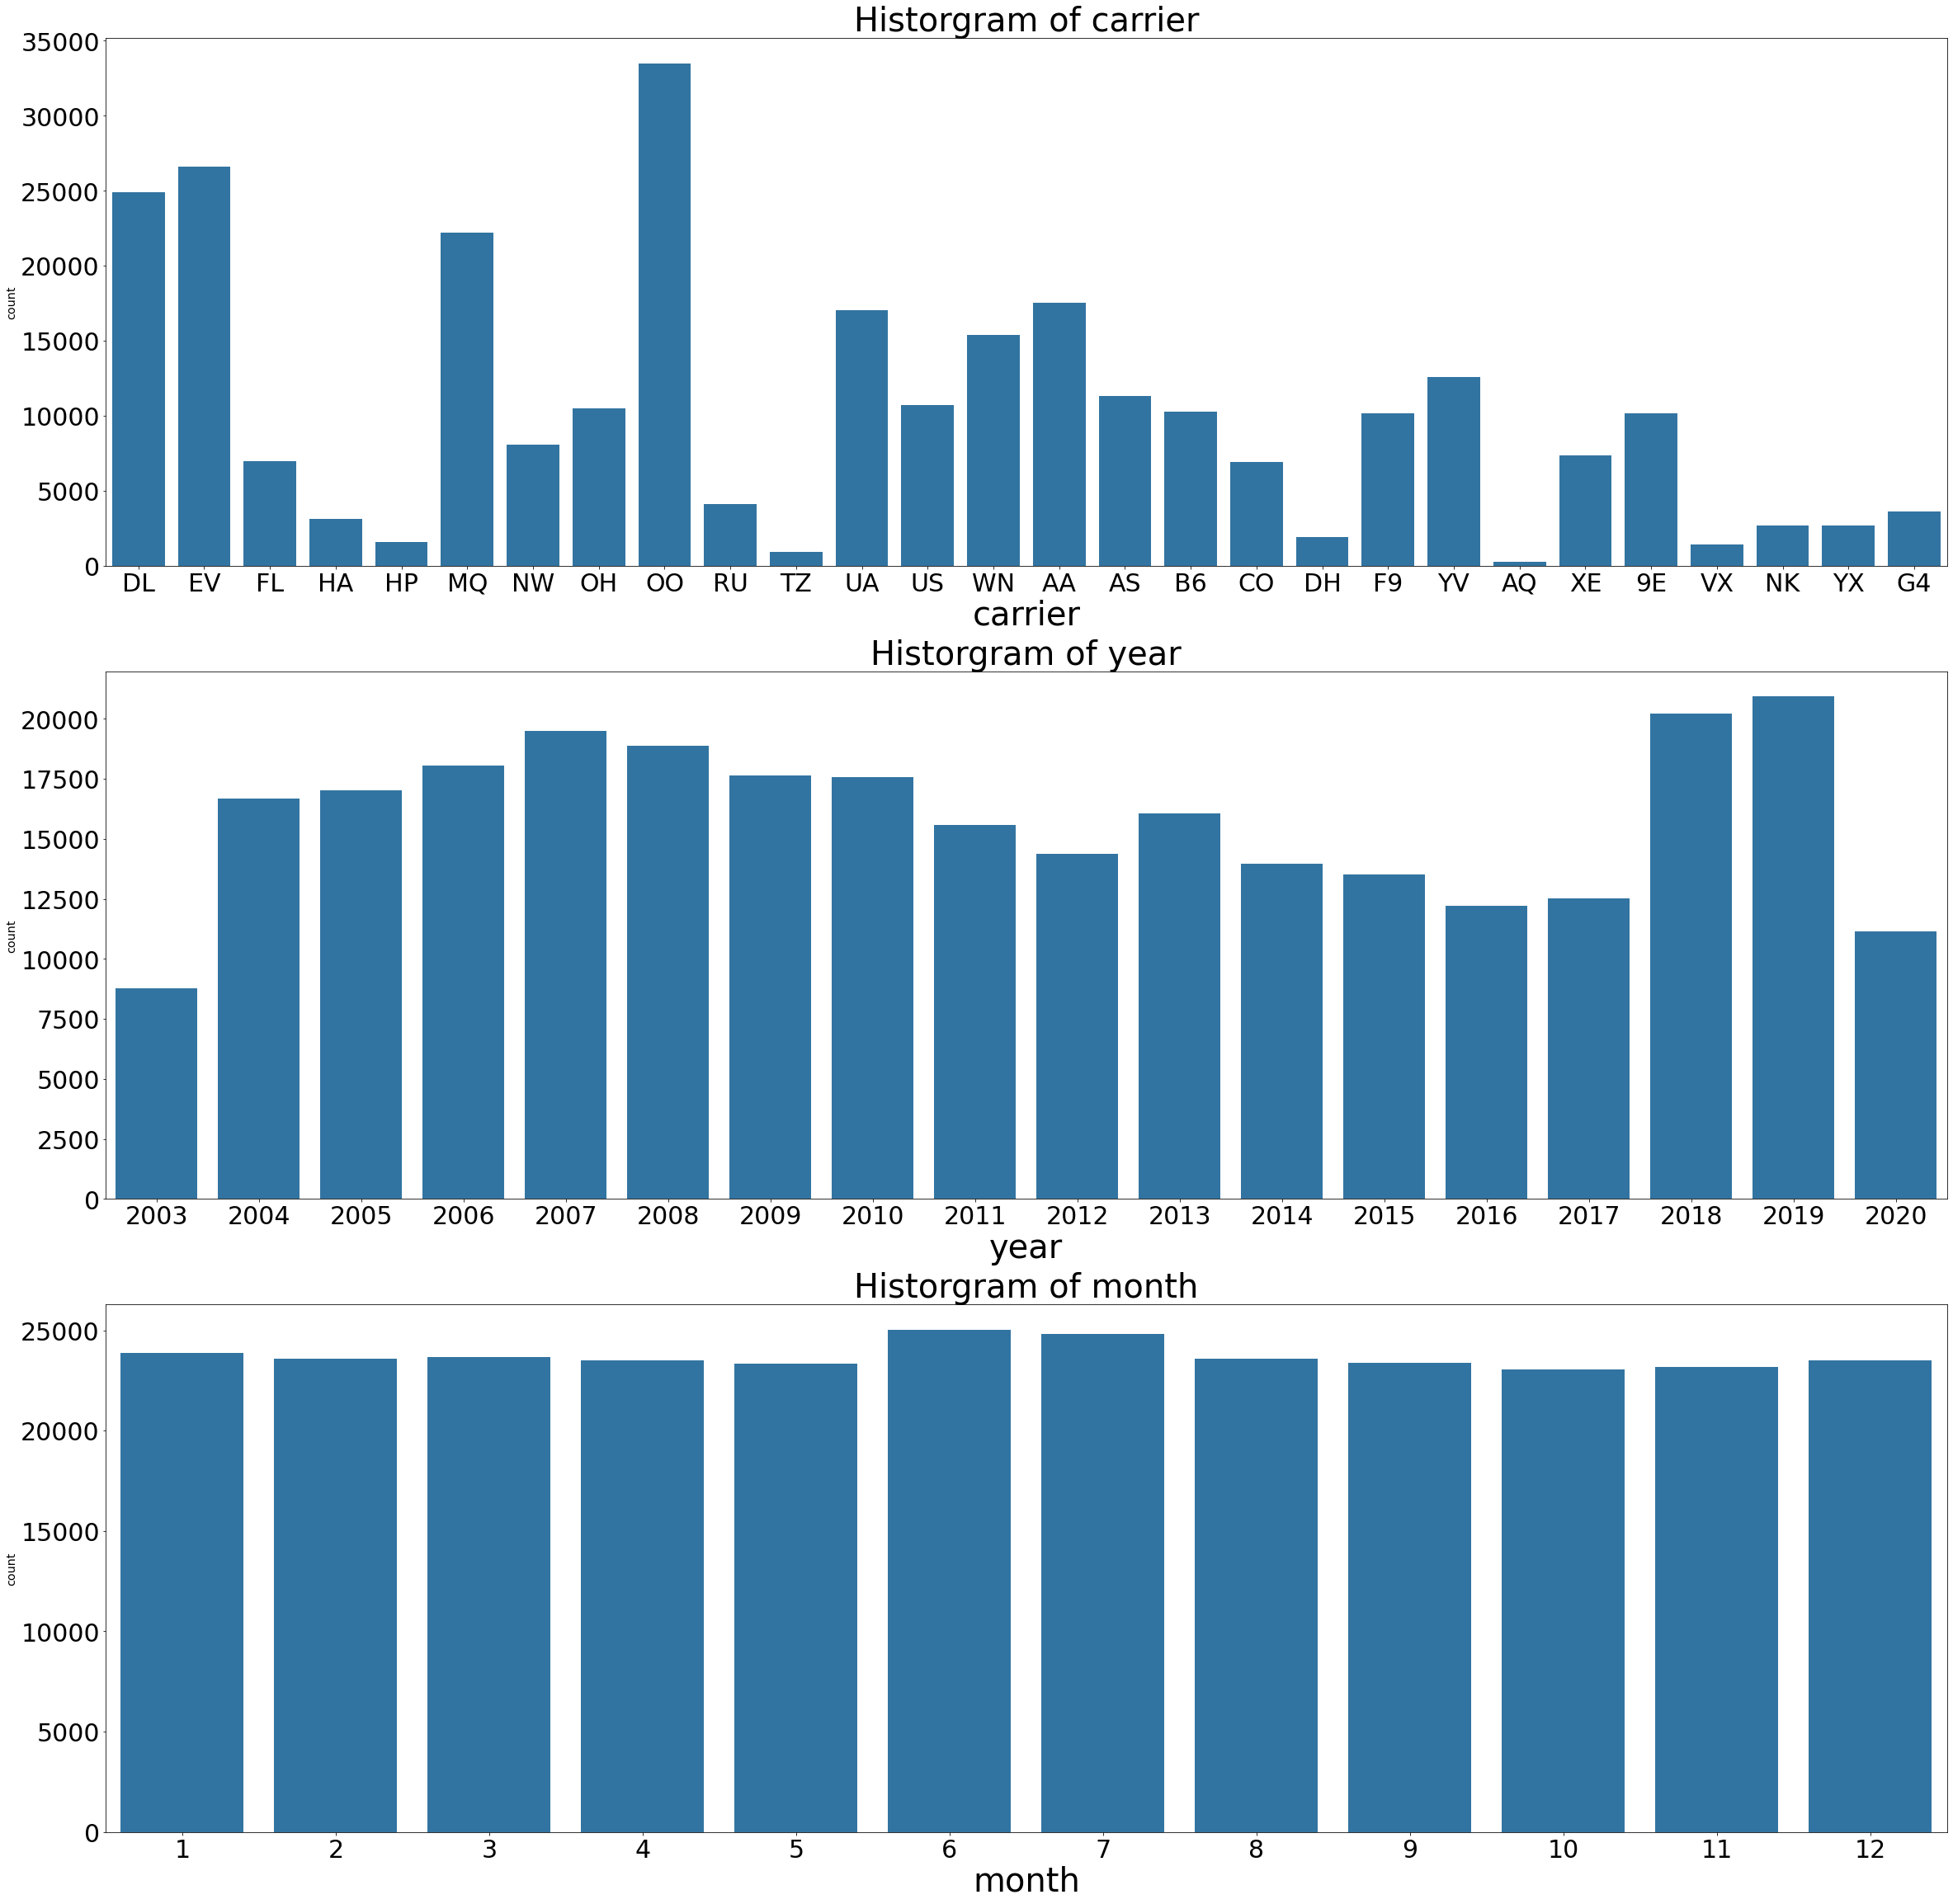

In [190]:
cat_univariate(columns)

### Insights from categorical variables

The distribution of delays over the month is pretty similar, I can notice a slight increment in June and July, most probalbu due the high demand for summer travels.

Looking at the years variables, there is an important peak during 2018 and 2019, which could be object of future study. 

Looking at the carriers variable, the carrier OO, has the most delays records, with a noticeable difference with the others.

### Discussin about the distributions of the variables of interest. 

All the numerical variables present a right skewed distribution, because of huge value outliers in the data. In this case, these outliers were presented in the delay data, whether for security issues, weather issues or others. It is understandable that there are some exceptions in the data such as delays that could have taken even days due to weather condition or any other problem. Due to these characteristics, I performed a logarithmic transformation in all of the delay values in order to get other type of insights.

### Operations performed on the data.

Most of the numerical distributions were right skewed because of outliers. I did not eliminate such outliers because I think they can be useful to extract specific insights on the data.

I did dropped some columns which were not valuable for the type of analysis I want to perform or the main question of my analysis which is to find what carrier or airport experiment more delays, and what type of delays. 

I also dropped some observations with missing values which could affect my analysis of this data. Regarding to data types, I performed some transformations described above to set proper categorical variables and integer data type over float types

## Bivariate Exploration

> In this section,  I investigate relationships between pairs of variables in the
data. 

**Exploring correlation between arr_flights and arr_delay**

In [217]:
data.describe()

,year,month,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,284515.000000,284515.000000,284515.000000,284515.000000,284515.000000,284515.000000,284515.000000,284515.000000,284515.000000,284515.000000,284515.000000,284515.000000
mean,2011.424793,6.478094,392.280790,75.901671,7.418129,0.895745,4347.396390,1286.074963,223.902838,1168.525234,6.930327,1661.962346
std,5.088662,3.438354,1047.545323,204.554402,38.313927,4.012219,12790.021015,3429.908081,866.759985,4845.725209,37.065482,5040.884545
min,2003.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-19.000000,0.000000,0.000000
25%,2007.000000,3.000000,60.000000,10.000000,0.000000,0.000000,480.000000,162.000000,0.000000,66.000000,0.000000,93.000000
50%,2011.000000,6.000000,124.000000,24.000000,1.000000,0.000000,1280.000000,458.000000,28.000000,223.000000,0.000000,385.000000
75%,2016.000000,9.000000,280.000000,58.000000,4.000000,1.000000,3202.000000,1120.000000,165.000000,642.000000,0.000000,1173.000000
max,2020.000000,12.000000,21977.000000,6377.000000,4951.000000,256.000000,433687.000000,196944.000000,57707.000000,238440.000000,3194.000000,148181.000000


In [219]:
len(data)

284515

In [233]:
# Setting the second data eliminating some outliers:
data_df = data[data.arr_delay < 5000]
len(data_df)

238212

In [227]:
data_df.describe()

,year,month,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,272703.000000,272703.000000,272703.000000,272703.000000,272703.000000,272703.000000,272703.000000,272703.000000,272703.000000,272703.000000,272703.000000,272703.000000
mean,2011.405624,6.479401,226.758466,42.926627,4.222080,0.474648,2329.978218,780.745254,131.229334,538.556719,4.065771,875.380429
std,5.092231,3.440923,351.696663,57.387299,23.538227,1.366760,3132.323877,1024.805869,285.362188,1021.465867,21.272345,1422.090722
min,2003.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-19.000000,0.000000,0.000000
25%,2007.000000,3.000000,60.000000,9.000000,0.000000,0.000000,456.000000,153.000000,0.000000,62.000000,0.000000,85.000000
50%,2011.000000,6.000000,120.000000,23.000000,1.000000,0.000000,1192.000000,426.000000,22.000000,205.000000,0.000000,351.000000
75%,2016.000000,9.000000,248.000000,51.000000,4.000000,1.000000,2811.000000,992.000000,138.000000,554.000000,0.000000,1005.000000
max,2020.000000,12.000000,6932.000000,579.000000,3154.000000,106.000000,19998.000000,15303.000000,7103.000000,17219.000000,2236.000000,15199.000000


''

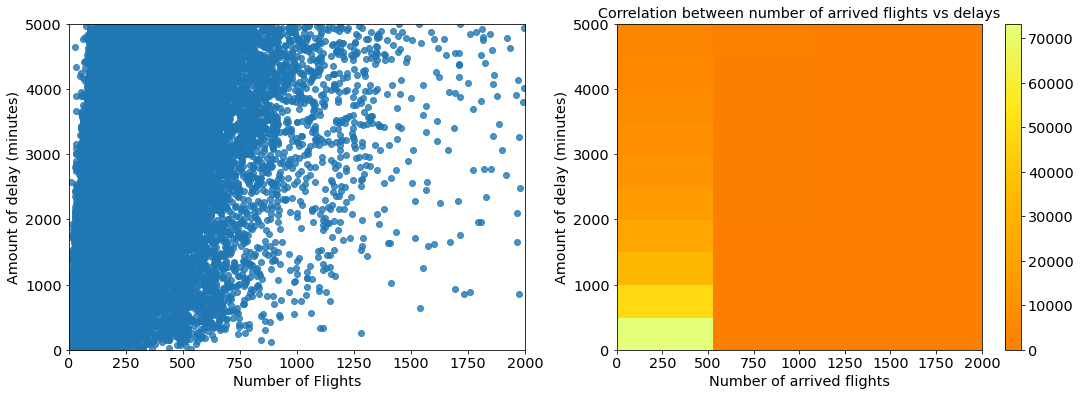

In [238]:
plt.figure(figsize=[18,6])

plt.subplot(1,2,1)
sb.regplot(data=data_df, x='arr_flights', y='arr_delay', x_jitter=0.05)
plt.xlabel("Number of Flights")
plt.ylabel("Amount of delay (minutes)")
plt.ylim(0,5000)
plt.xlim(0,2000)



plt.subplot(1,2,2)
plt.hist2d(data=data_df, x='arr_flights', y='arr_delay', cmap='Wistia_r')
plt.colorbar()
plt.xlabel("Number of arrived flights")
plt.ylabel("Amount of delay (minutes)")
plt.title("Correlation between number of arrived flights vs delays")
plt.xlim(0,2000)
plt.ylim(0,5000)
;

**Insight**

The correlation graphs from above show a high concentration of different time of delays regarding the number of flights. For numbers of flights less than 1000 the data presents different amount of time delays, making hard to find a strong relationship among them, visually speaking.

#### Exploring the relation between the year and the arrival delays

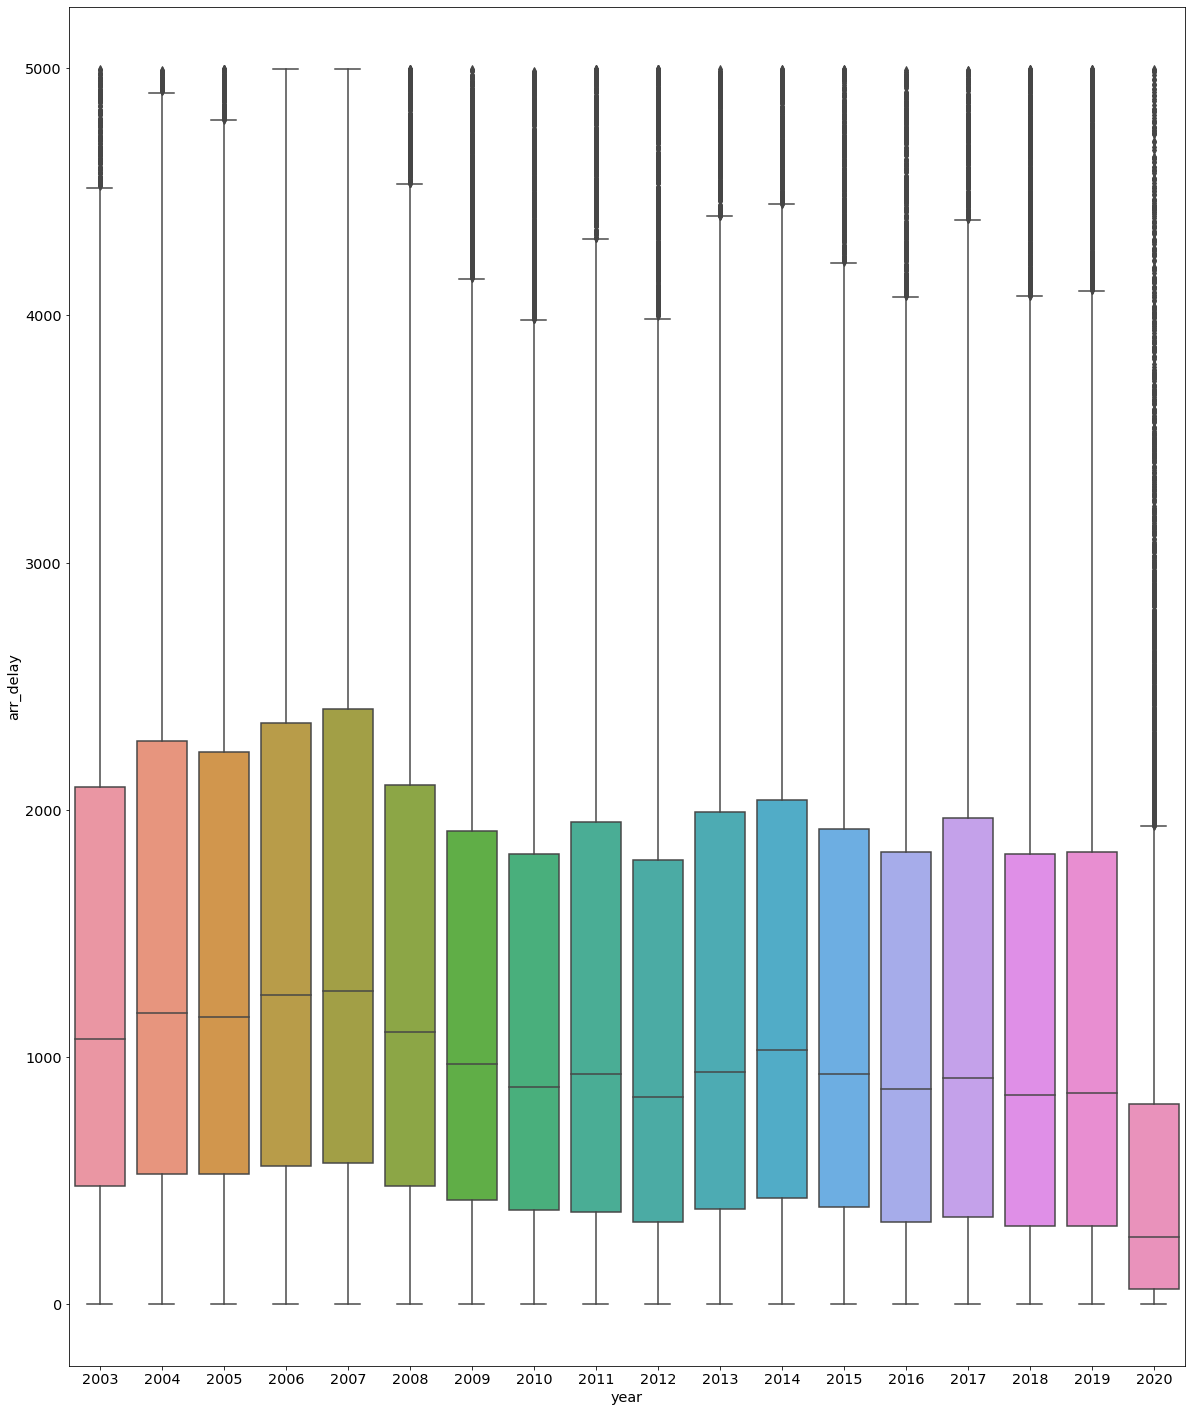

In [235]:
# Relationship between year and arrival delay time
plt.figure(figsize=(20, 25))
sb.boxplot(data=data_df, x = 'year', y='arr_delay');

#### Insights

2007 is the year with highest average of time delays. 2020 is the one with lest average delay, mostly because of the short amount of flights.

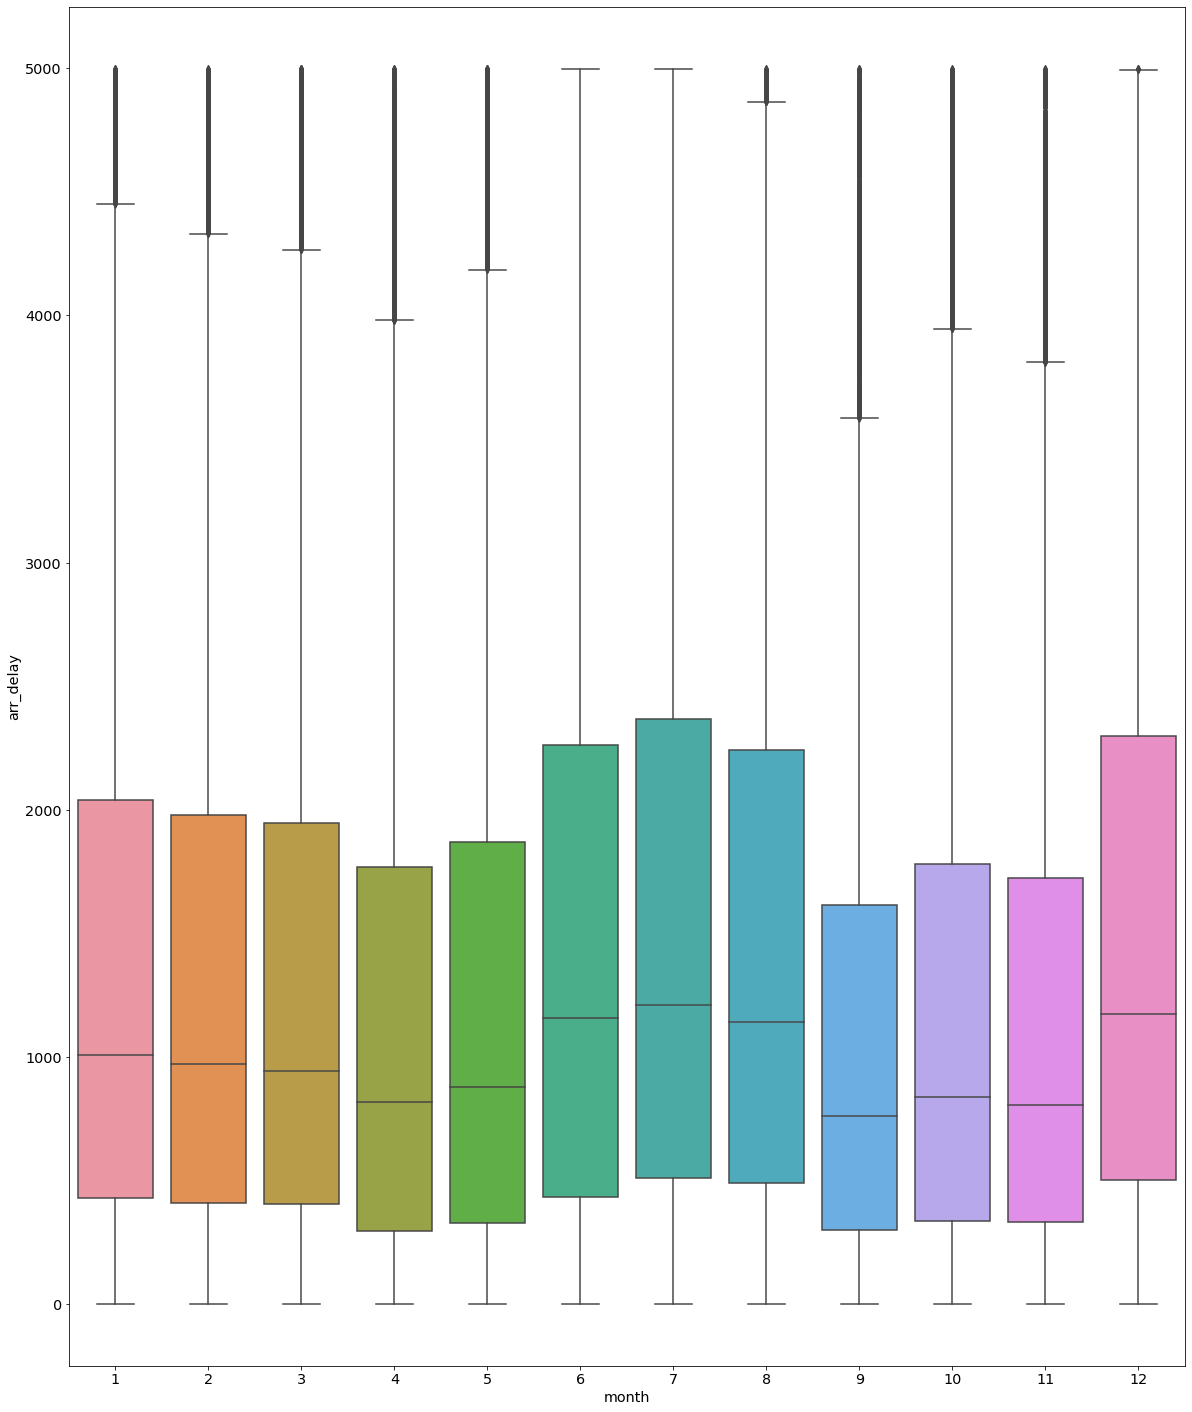

In [241]:
plt.figure(figsize=(20, 25))
sb.boxplot(data=data_df, x = 'month', y='arr_delay');

### Insights

The graph reaffirms an observation previously obtained that showed June and July as the months with more delays, adding in this graph December, which is another month with high demand on traveling.


In [253]:
data.head(2)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2004,1,DL,Delta Air Lines Inc.,PBI,"West Palm Beach/Palm Beach, FL: Palm Beach Int...",650.0,126.0,4.0,0.0,5425.0,881.0,397.0,2016.0,15.0,2116.0
1,2004,1,DL,Delta Air Lines Inc.,PDX,"Portland, OR: Portland International",314.0,61.0,30.0,3.0,2801.0,478.0,239.0,1365.0,0.0,719.0


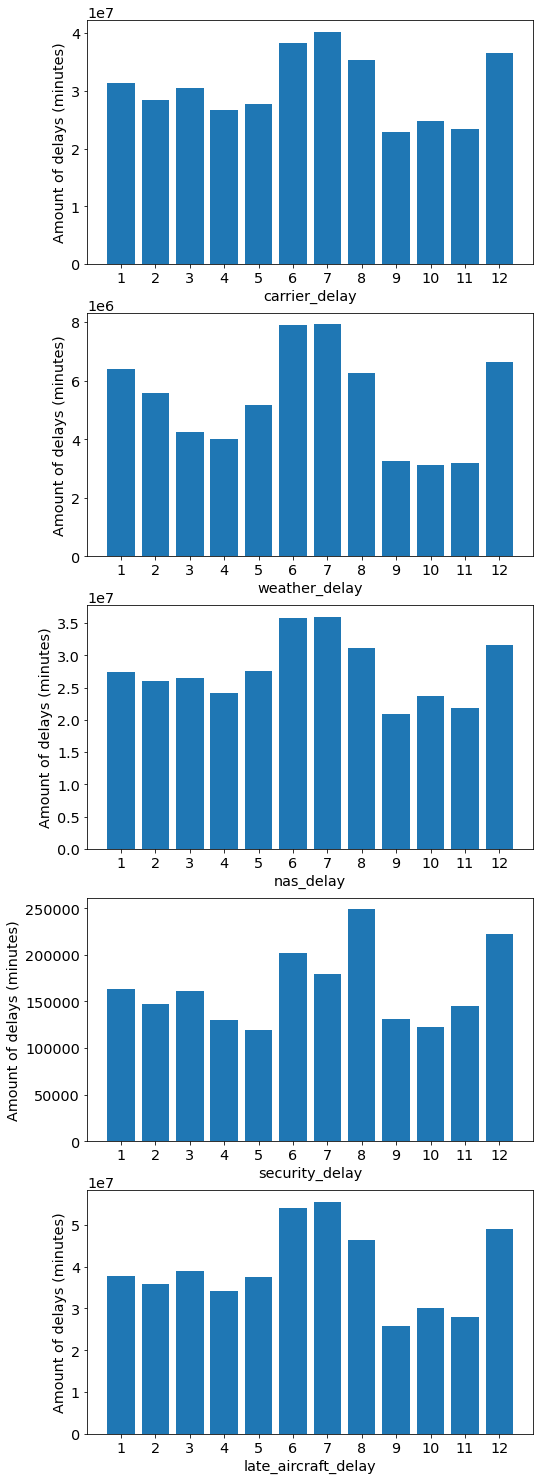

In [265]:
# To confirm above data, I group by my original data by month and 
# used the sum function to summarize the amount of minute delay by
#. In this case, arr_delay outliers are included

data_month = data.groupby(by='month').sum()

fig, ax = plt.subplots(nrows=5, figsize = [8,26])

columns = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay','late_aircraft_delay' ]
for i in range(len(columns)):
    var = columns[i]
    plt.subplot(5,1,i+1)
    plt.bar(x = data_month.index, height = data_month[var])
    plt.xticks(data_month.index, data_month.index)
    plt.xlabel(var)
    plt.ylabel("Amount of delays (minutes)")


### Insights

All of the delays variable show similar signal by month and the general amount of delay. There are some peculiarities such a being August the month of most delays regarding Security and January with a high value of time delay because of weather, being this month part of Winter, usually with heavy snow storms.

In [266]:
data.head(2)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2004,1,DL,Delta Air Lines Inc.,PBI,"West Palm Beach/Palm Beach, FL: Palm Beach Int...",650.0,126.0,4.0,0.0,5425.0,881.0,397.0,2016.0,15.0,2116.0
1,2004,1,DL,Delta Air Lines Inc.,PDX,"Portland, OR: Portland International",314.0,61.0,30.0,3.0,2801.0,478.0,239.0,1365.0,0.0,719.0


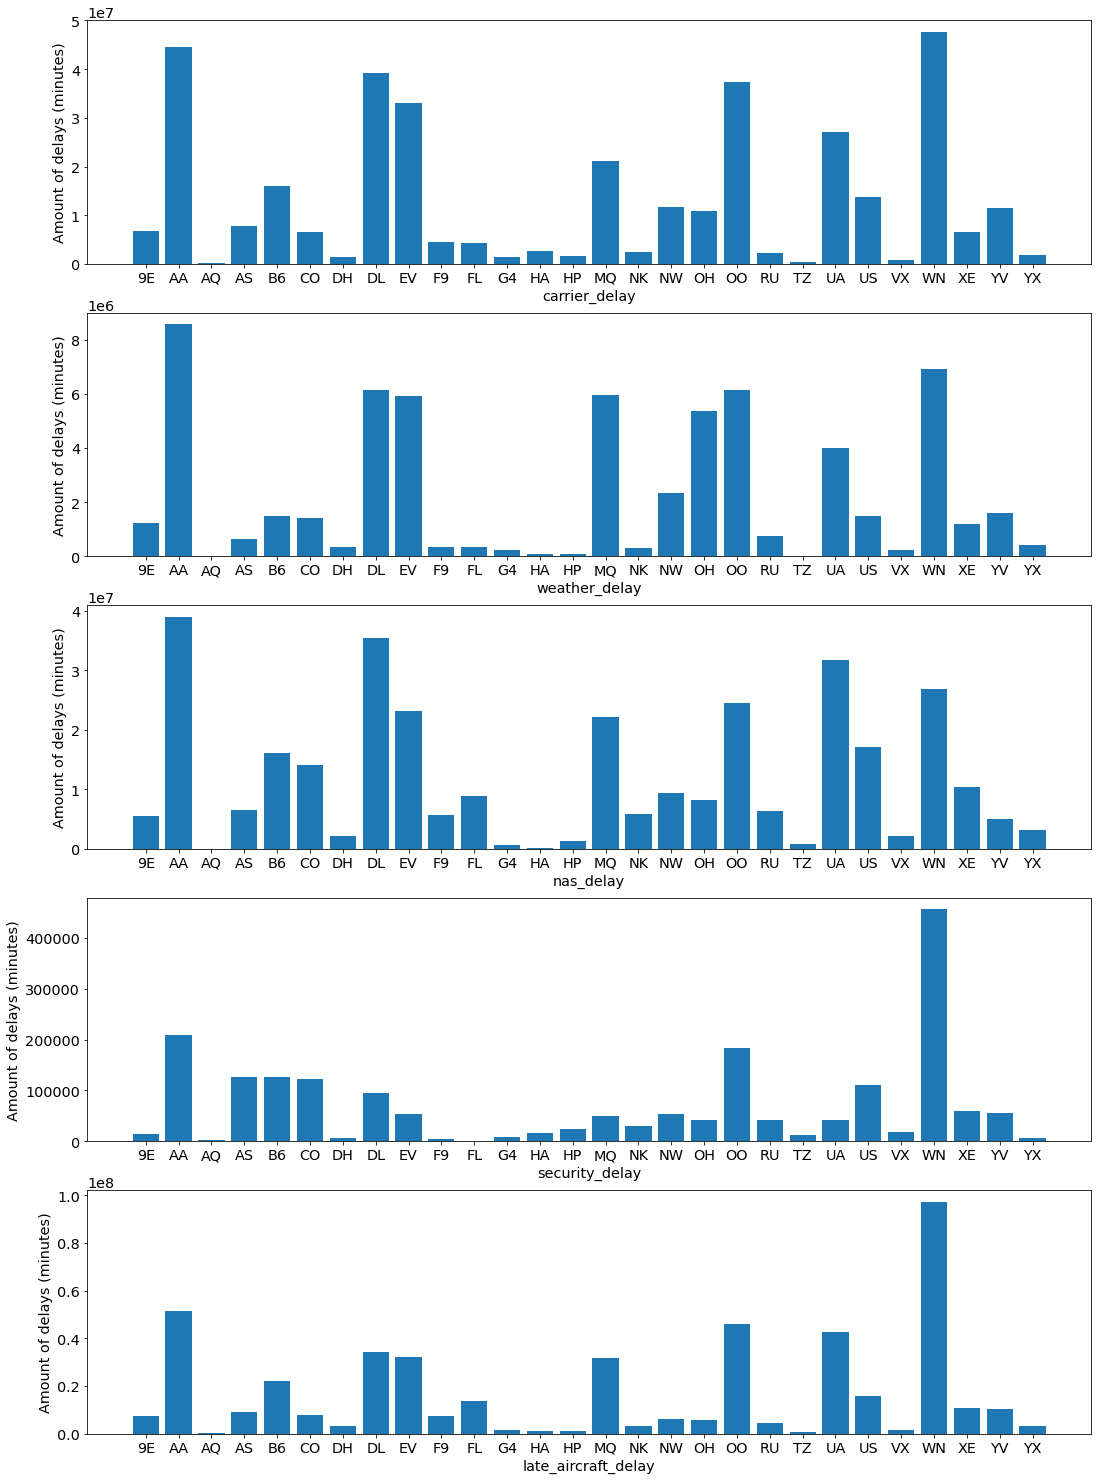

In [281]:
#Faceting the carrier per arr_delay with not delay outliers
data_carrier = data.groupby(by='carrier').sum()
fig, ax = plt.subplots(nrows=5, figsize = [18,26])

columns = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay','late_aircraft_delay' ]
for i in range(len(columns)):
    var = columns[i]
    plt.subplot(5,1,i+1)
    plt.bar(x = data_carrier.index, height = data_carrier[var])
    plt.xticks(data_carrier.index, data_carrier.index)
    plt.xlabel(var)
    plt.ylabel("Amount of delays (minutes)")

**Insights**
 - American Airlines (aka AA) is the carrier with the highest delays in their flights overall.
 - Southwest Airlines is the carrier with highest delays due to Security and late aircraft.
 

### Relationships observed in this part of the investigation. 

In this part of the investigation I could confirm that summer months such as June, July, August and December on Christmas are the months with the most delays in the lines overall. In addition, January is one of the month with more delays due to weather condition most probably because this is a month where many snow storms happen.

### Observed relationships between other features (not the main feature(s) of interest)

The data is quite straighforward regarding the relationship delays months. American Airlines showed to be the line with the higher amount of delays overall, in part most probably related with this being one of the most commont airlines around the country.

Some interesting relationship is the high amount of delays due to security issues of the Southeast Airlines. It could be either related to a strict security procedure of boarding, or common technical issues in their equipment.

## Multivariate Exploration


**Correlation between the number of flights and cancelled, diverted and delayed flights**

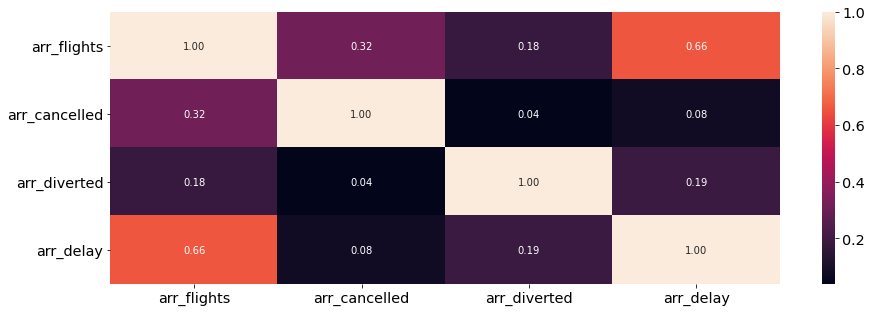

In [314]:
sb.heatmap(data_df[['arr_flights', 'arr_cancelled', 'arr_diverted', 'arr_delay']].corr(), annot=True, fmt = '.2f')

### Relationship of the most common airline with their delays by month

**Extracting the data with the top 10 airlines with more delayed flights**

In [318]:
# Top 10 airlines with more delays
top_10_most_common_airlines = data.carrier.value_counts()[:10].index


# Data with the most common airlines
top_airlines = data.query("carrier in @top_10_most_common_airlines")
top_airlines.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2004,1,DL,Delta Air Lines Inc.,PBI,"West Palm Beach/Palm Beach, FL: Palm Beach Int...",650.0,126.0,4.0,0.0,5425.0,881.0,397.0,2016.0,15.0,2116.0
1,2004,1,DL,Delta Air Lines Inc.,PDX,"Portland, OR: Portland International",314.0,61.0,30.0,3.0,2801.0,478.0,239.0,1365.0,0.0,719.0
2,2004,1,DL,Delta Air Lines Inc.,PHL,"Philadelphia, PA: Philadelphia International",513.0,97.0,15.0,0.0,4261.0,1150.0,16.0,2286.0,0.0,809.0
3,2004,1,DL,Delta Air Lines Inc.,PHX,"Phoenix, AZ: Phoenix Sky Harbor International",334.0,78.0,3.0,1.0,3400.0,1159.0,166.0,1295.0,0.0,780.0
4,2004,1,DL,Delta Air Lines Inc.,PIT,"Pittsburgh, PA: Pittsburgh International",217.0,47.0,4.0,1.0,1737.0,350.0,28.0,522.0,0.0,837.0


In [319]:
top_airlines = top_airlines.groupby(['month', 'carrier']).sum()[['arr_delay','carrier_delay','weather_delay', 'nas_delay','security_delay','late_aircraft_delay']]
top_airlines.head()

arr_delay  carrier_delay  weather_delay  nas_delay  \
month carrier                                                        
1     AA       11113771.0      3590292.0       776581.0  2948742.0   
      AS        2189071.0       653873.0       102375.0   598113.0   
      DL        9453975.0      3201811.0       863551.0  2765536.0   
      EV        7730177.0      2813379.0       498454.0  1760375.0   
      MQ        7530301.0      1801706.0       674571.0  2136721.0   

               security_delay  late_aircraft_delay  
month carrier                                       
1     AA              18700.0            3779456.0  
      AS               7448.0             827262.0  
      DL               5743.0            2617334.0  
      EV               3056.0            2654913.0  
      MQ               4890.0            2912413.0

In [322]:
top_airlines = top_airlines.reset_index()
top_airlines.head(3)

,month,carrier,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,1,AA,11113771.0,3590292.0,776581.0,2948742.0,18700.0,3779456.0
1,1,AS,2189071.0,653873.0,102375.0,598113.0,7448.0,827262.0
2,1,DL,9453975.0,3201811.0,863551.0,2765536.0,5743.0,2617334.0


In [417]:
data[data.carrier == 'US'][:3]

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
888,2004,1,US,US Airways Inc.,ALB,"Albany, NY: Albany International",267.0,51.0,3.0,0.0,2306.0,643.0,0.0,882.0,0.0,781.0
889,2004,1,US,US Airways Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",200.0,50.0,6.0,0.0,2229.0,309.0,4.0,1324.0,0.0,592.0
890,2004,1,US,US Airways Inc.,BDL,"Hartford, CT: Bradley International",479.0,86.0,3.0,1.0,3972.0,1237.0,40.0,1237.0,0.0,1458.0


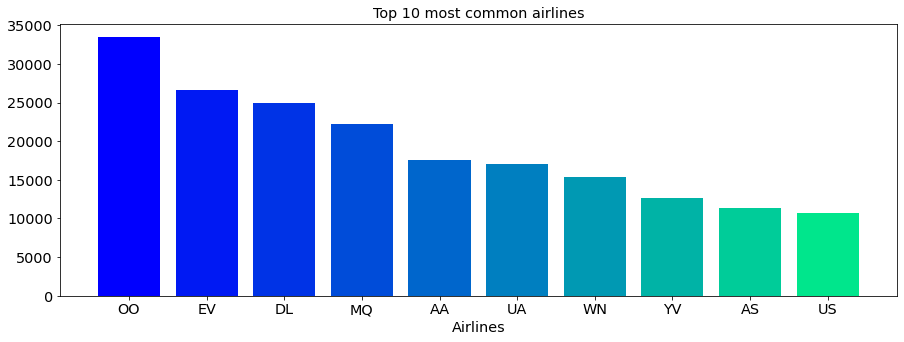

In [361]:
# Top 10 most common airlines
import matplotlib.cm as cm
from matplotlib.colors import Normalize
my_cmap = cm.get_cmap('winter_r')
values = [20,18,16,14,12,10,8,6,4,2,0]

my_norm = Normalize(vmin=0, vmax=20)

plt.bar(x=data.carrier.value_counts()[:10].index, height=data.carrier.value_counts()[:10], color=my_cmap(my_norm(values)) )
plt.title("Top 10 most common airlines")
plt.xlabel("Airlines")
plt.ylabel("Number of Flights");

**Relationship of the airlines vs late aircraft delay by month**

C:\Users\manit\anaconda3\envs\Data_Science\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


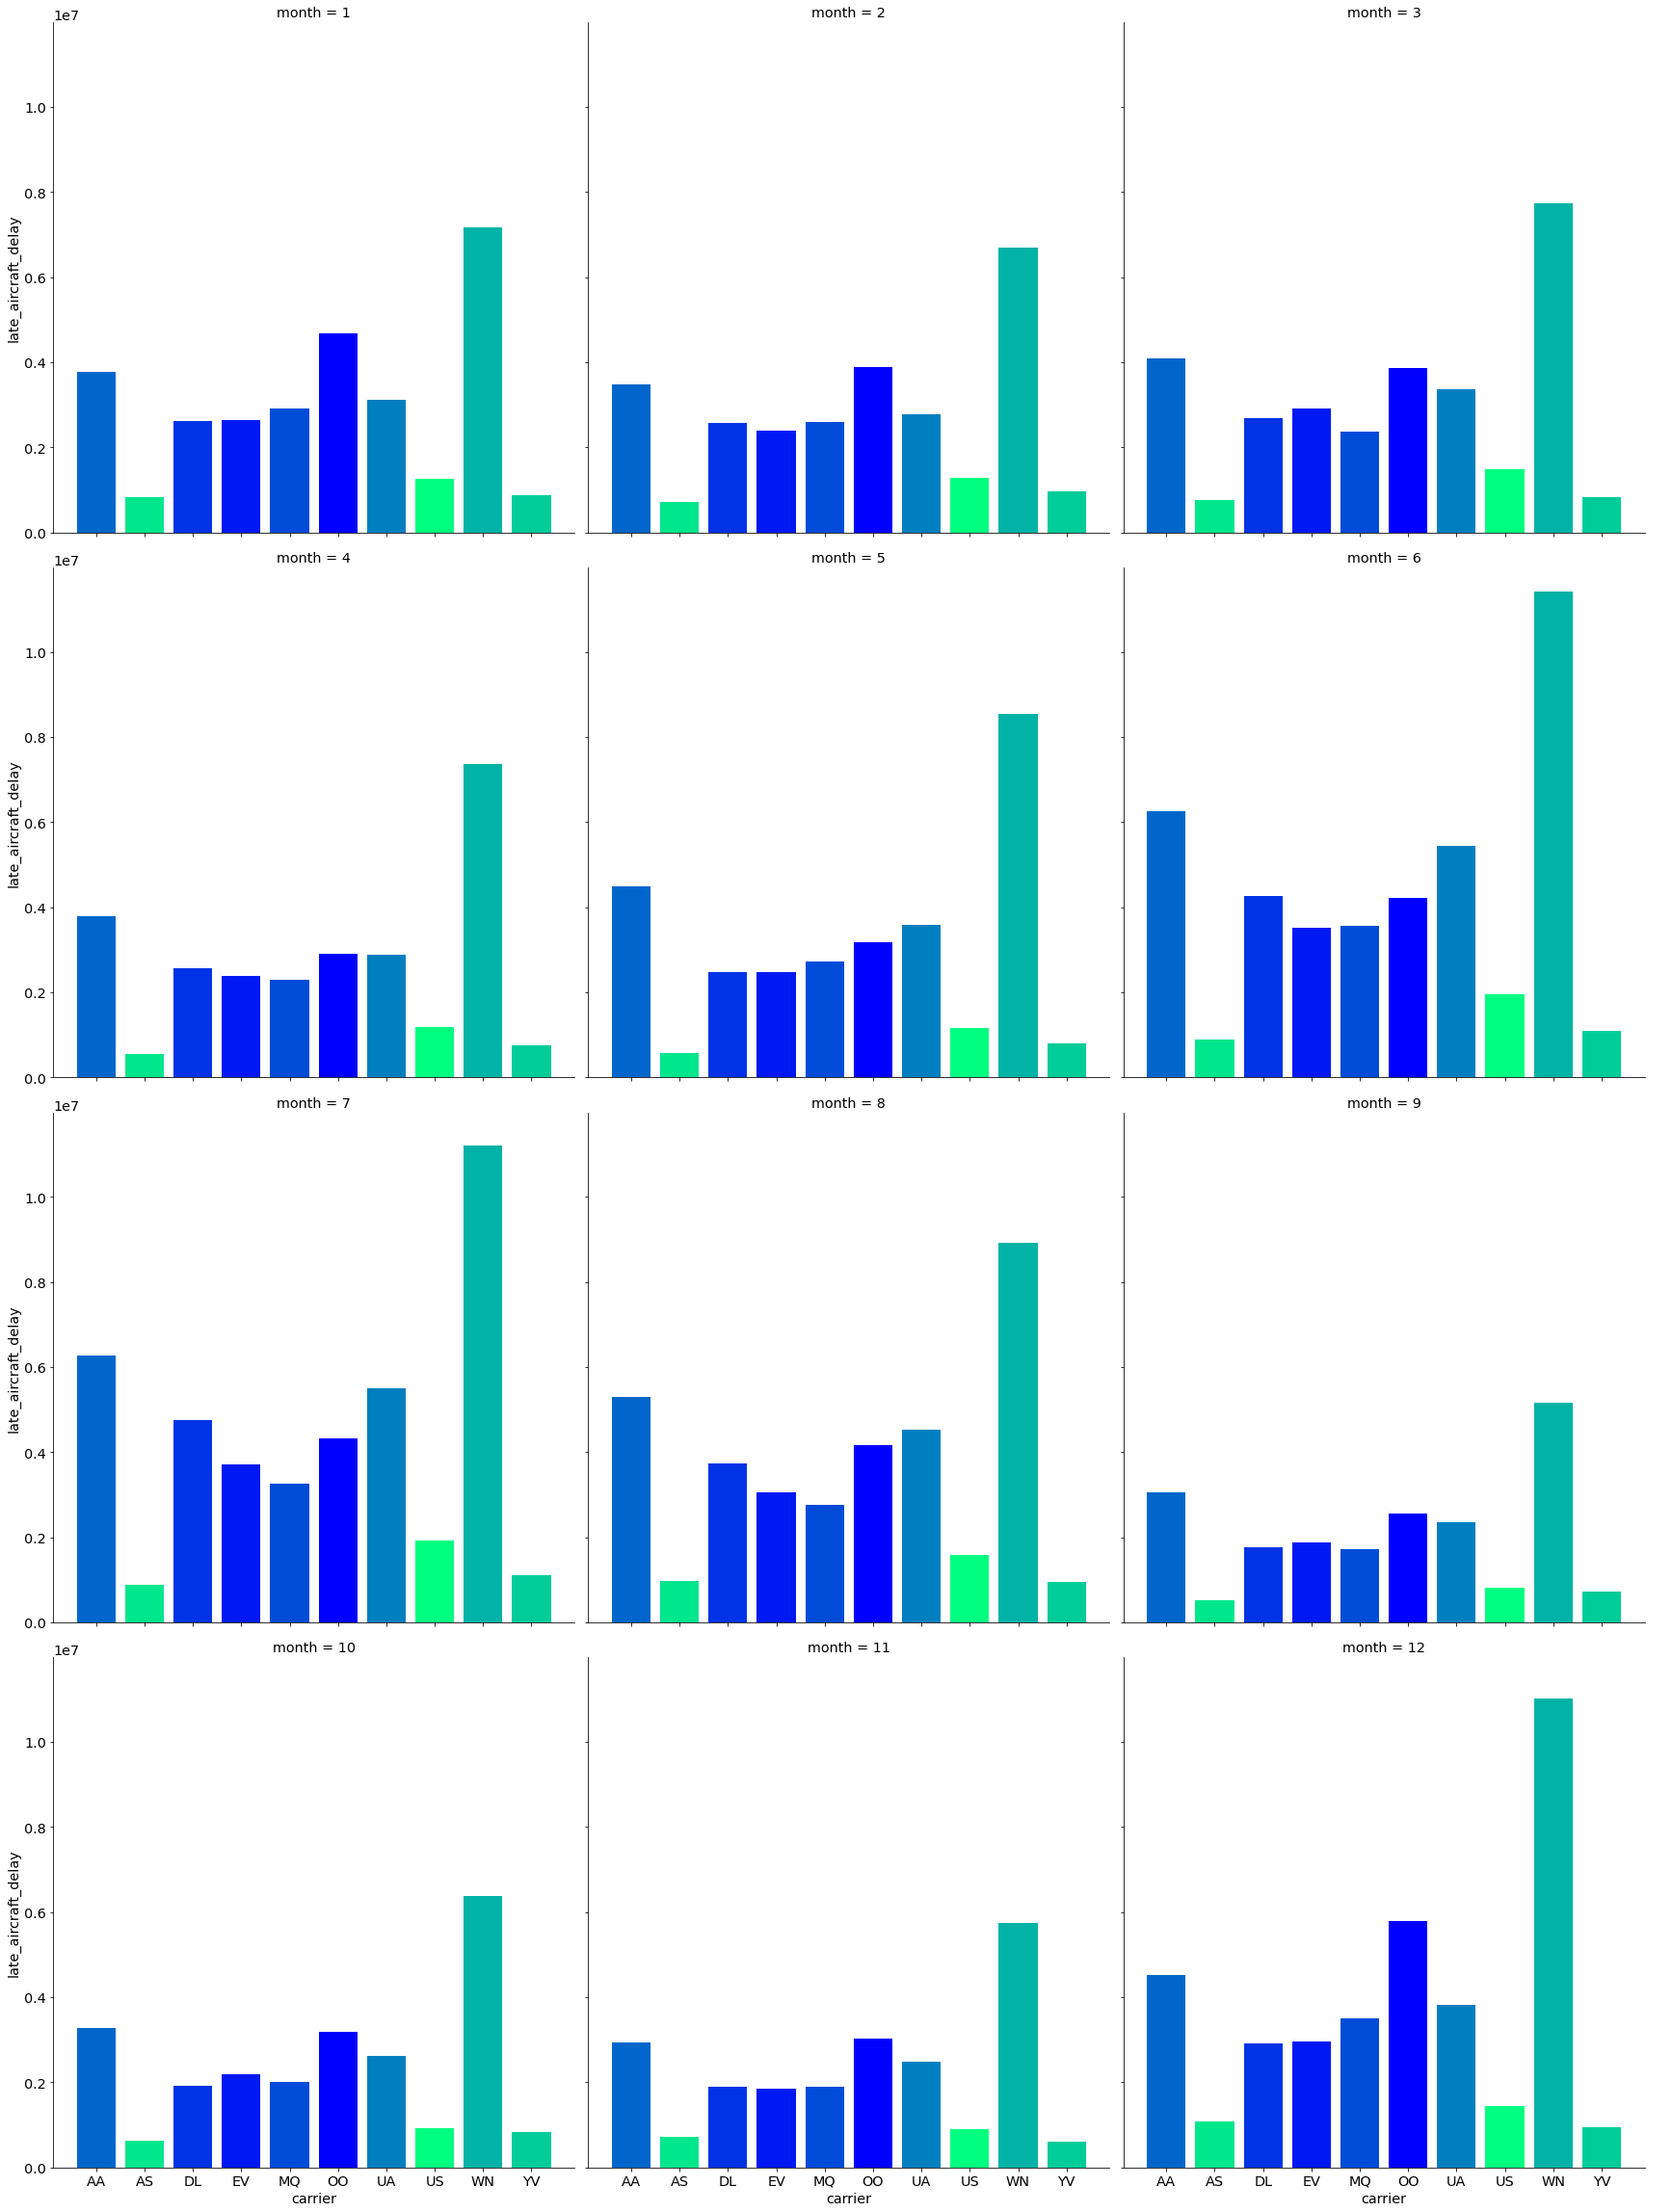

In [362]:
values = [12,2,16,18,14,20,10,0,6,4]
g = sb.FacetGrid(data=top_airlines, col='month', col_wrap = 3, size=8)
g.map(plt.bar, 'carrier', 'late_aircraft_delay', color = my_cmap(my_norm(values)))
g.add_legend();

**Relationship of the airlines vs weather delay by month**

C:\Users\manit\anaconda3\envs\Data_Science\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


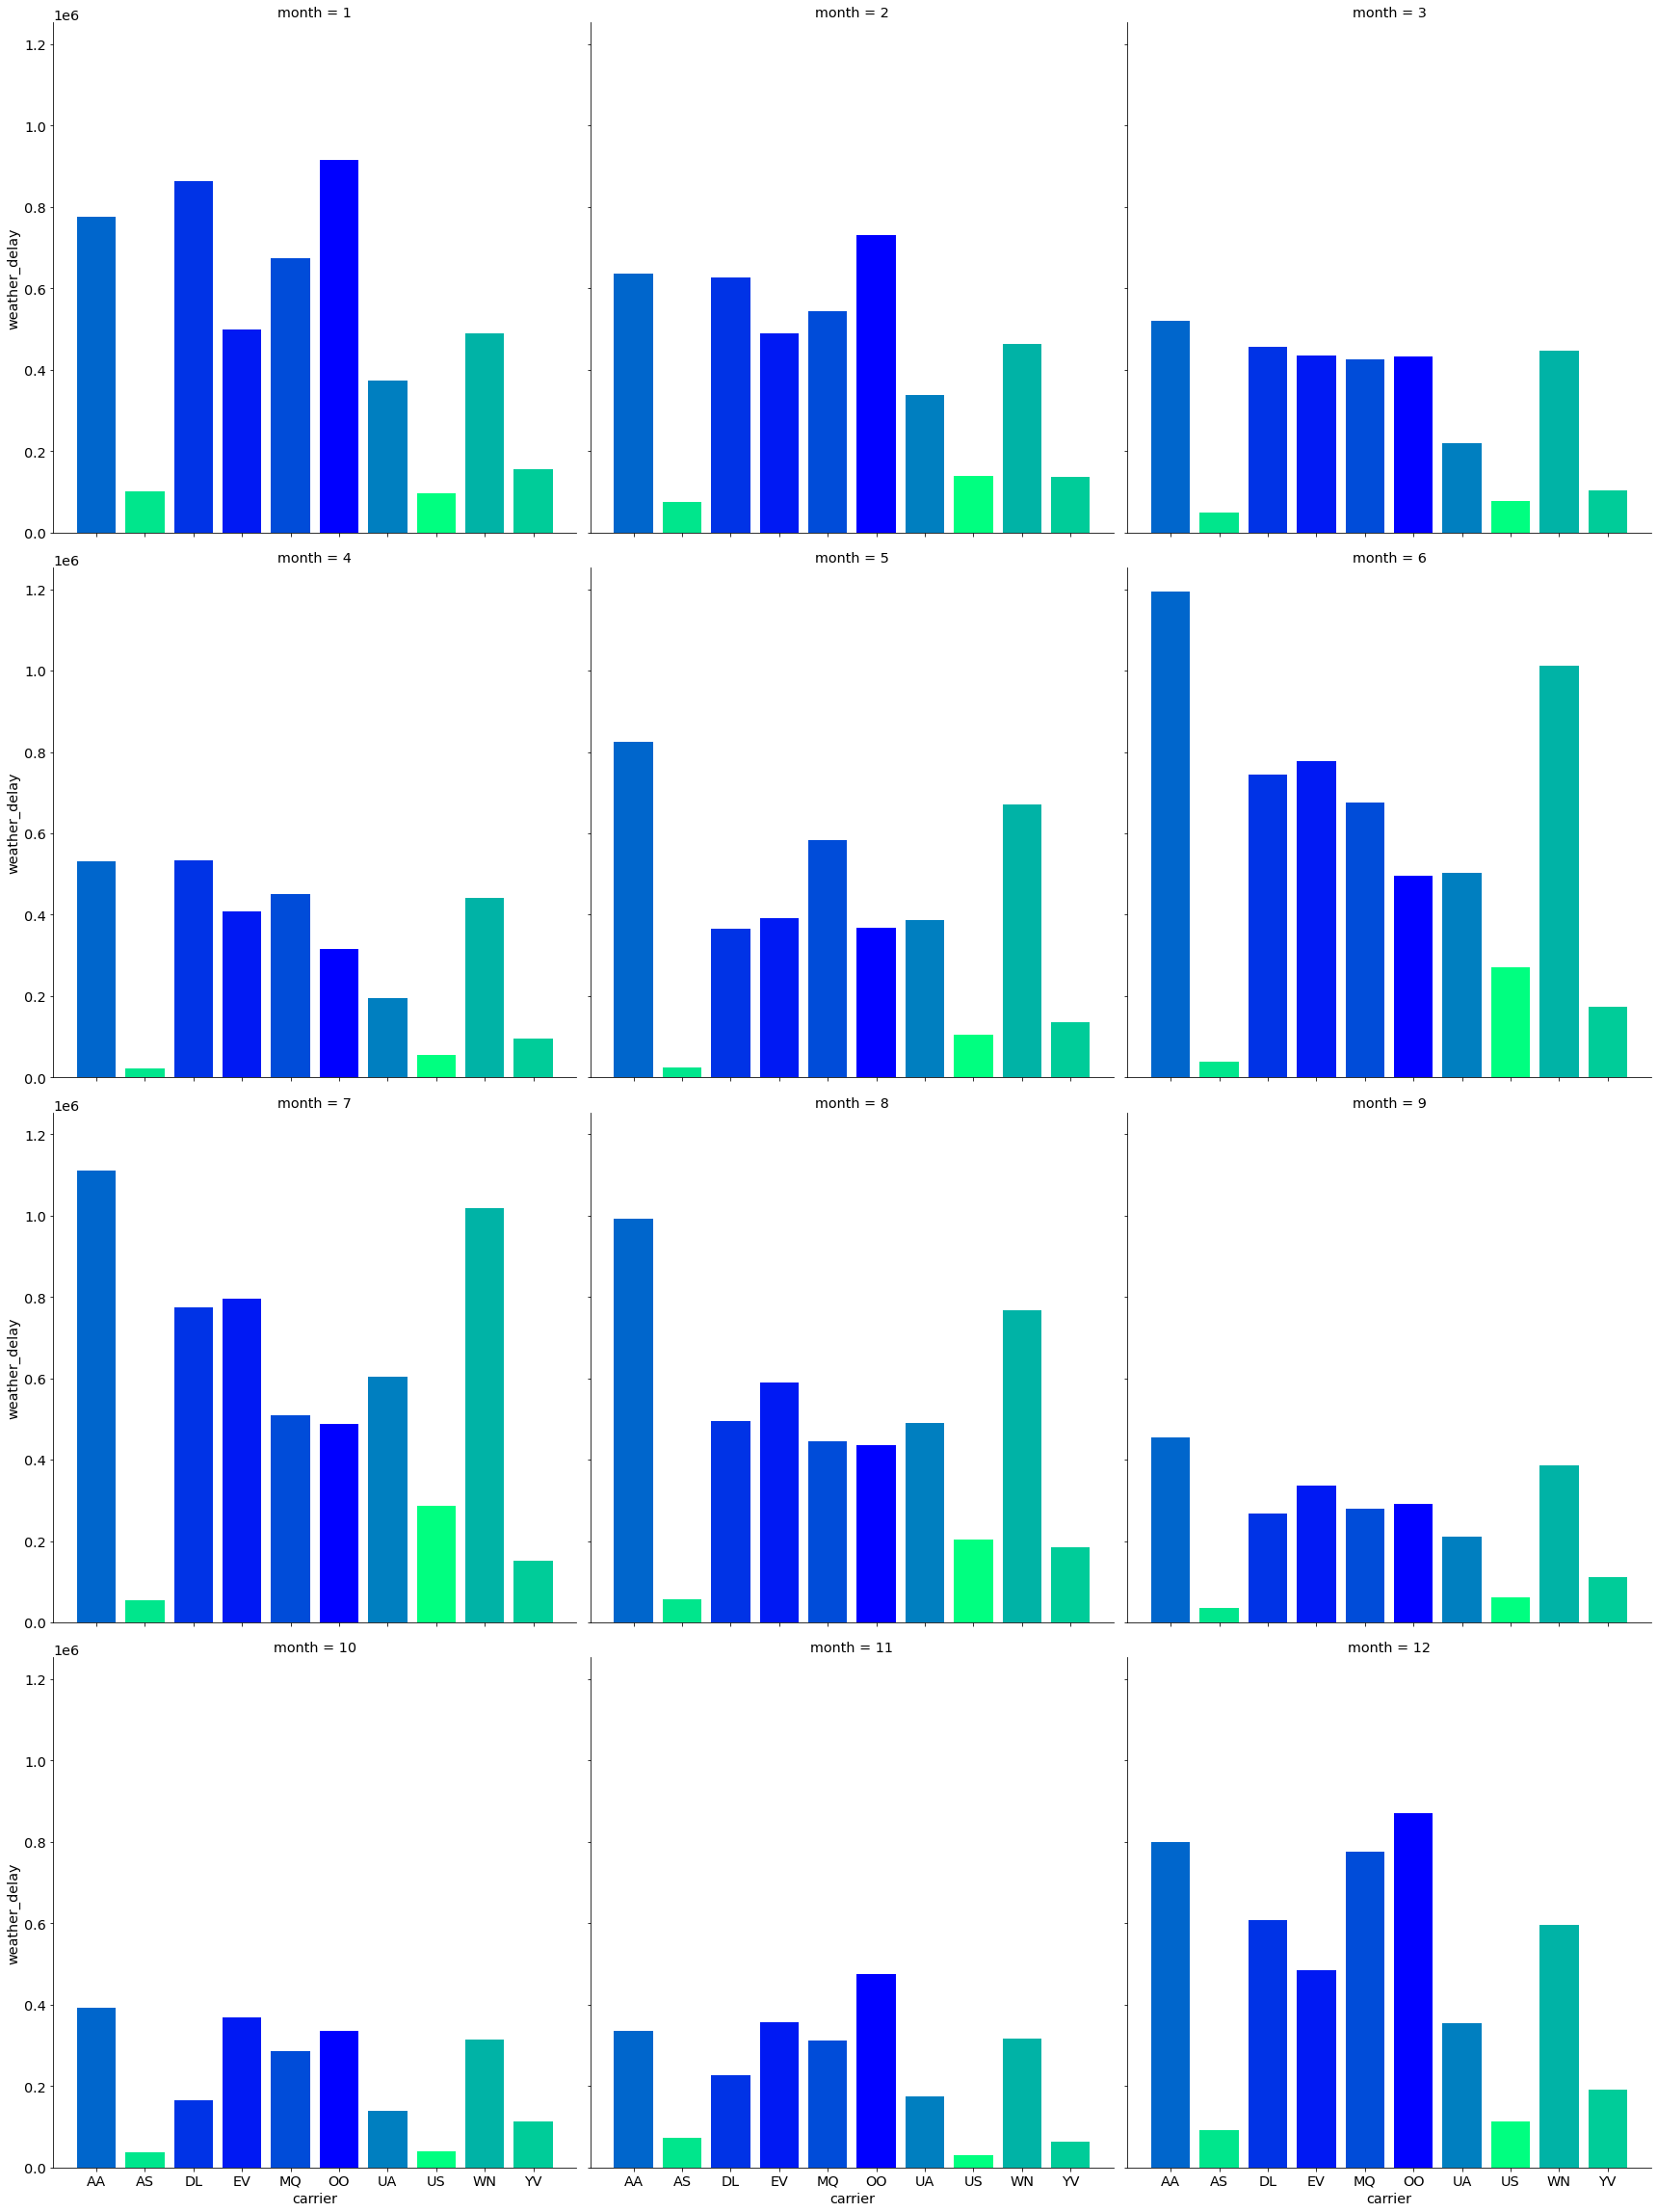

In [364]:

g = sb.FacetGrid(data=top_airlines, col='month', col_wrap = 3, size=8)
g.map(plt.bar, 'carrier', 'weather_delay', color = my_cmap(my_norm(values)));

### Top 5 busiest airport vs Delays by the Top 10 Airlines

In the following plot I will describe the total delay by the top 10 Airlines (the ones from above) in the top 10 busiest Airport. I will use the data with not delay outliers.

**Extracting the top 10 airports**

In [365]:
data.head(3)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2004,1,DL,Delta Air Lines Inc.,PBI,"West Palm Beach/Palm Beach, FL: Palm Beach Int...",650.0,126.0,4.0,0.0,5425.0,881.0,397.0,2016.0,15.0,2116.0
1,2004,1,DL,Delta Air Lines Inc.,PDX,"Portland, OR: Portland International",314.0,61.0,30.0,3.0,2801.0,478.0,239.0,1365.0,0.0,719.0
2,2004,1,DL,Delta Air Lines Inc.,PHL,"Philadelphia, PA: Philadelphia International",513.0,97.0,15.0,0.0,4261.0,1150.0,16.0,2286.0,0.0,809.0


In [380]:
top_5_airports = data.airport.value_counts()[:5].index
top_5_airports

Index(['DTW', 'LAX', 'LAS', 'MCI', 'DCA'], dtype='object')

**Extracting the data without outliers with the top 5 airports and top 10 airlines**

In [381]:
data_top = data_df.query("airport in @top_5_airports & carrier in @top_10_most_common_airlines")
data_top.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
58,2004,1,EV,Atlantic Southeast Airlines,DCA,"Washington, DC: Ronald Reagan Washington National",123.0,16.0,5.0,0.0,739.0,447.0,183.0,44.0,0.0,65.0
62,2004,1,EV,Atlantic Southeast Airlines,DTW,"Detroit, MI: Detroit Metro Wayne County",62.0,3.0,7.0,0.0,72.0,40.0,0.0,0.0,0.0,32.0
87,2004,1,EV,Atlantic Southeast Airlines,LAS,"Las Vegas, NV: McCarran International",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93,2004,1,EV,Atlantic Southeast Airlines,MCI,"Kansas City, MO: Kansas City International",87.0,11.0,1.0,0.0,536.0,232.0,242.0,23.0,0.0,39.0
264,2004,1,MQ,American Eagle Airlines Inc.,DTW,"Detroit, MI: Detroit Metro Wayne County",120.0,41.0,7.0,0.0,1796.0,501.0,51.0,522.0,22.0,700.0


**Plotting**

In [422]:
data[data.airport == 'LAX'][:3]

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
175,2004,1,HA,Hawaiian Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",91.0,33.0,1.0,0.0,1135.0,855.0,0.0,0.0,0.0,280.0
210,2004,1,HP,America West Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",697.0,160.0,9.0,2.0,5866.0,2354.0,149.0,2449.0,21.0,893.0
288,2004,1,MQ,American Eagle Airlines Inc.,LAX,"Los Angeles, CA: Los Angeles International",2065.0,162.0,32.0,1.0,7709.0,1686.0,125.0,1715.0,5.0,4178.0


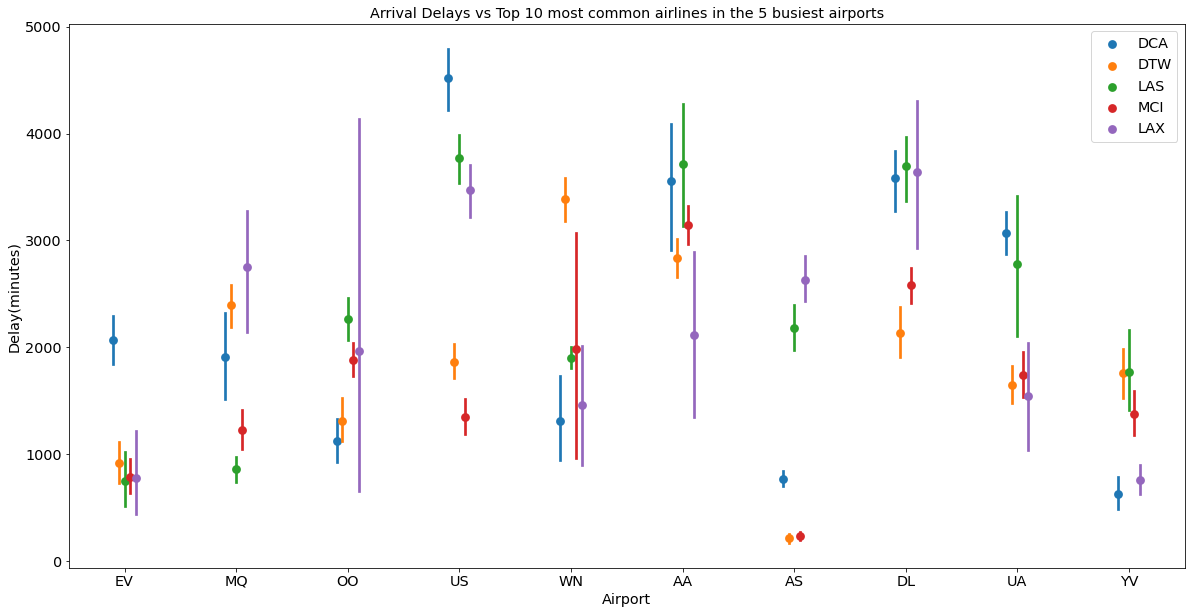

In [399]:
#Plotting a pointplot in seaborn

plt.figure(figsize=(20,10))
sb.pointplot(data=data_top, x='carrier', y='arr_delay', hue='airport', dodge=0.2, linestyles="", palette='tab10')
plt.xlabel("Airport")
plt.ylabel("Delay(minutes)")
plt.title("Arrival Delays vs Top 10 most common airlines in the 5 busiest airports")
plt.legend();


In [407]:
data[data.carrier == "OO"][:2]

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
569,2004,1,OO,SkyWest Airlines Inc.,ABI,"Abilene, TX: Abilene Regional",83.0,14.0,2.0,0.0,362.0,362.0,0.0,0.0,0.0,0.0
570,2004,1,OO,SkyWest Airlines Inc.,ABQ,"Albuquerque, NM: Albuquerque International Sun...",279.0,83.0,2.0,0.0,3480.0,1889.0,292.0,1106.0,54.0,139.0


### Relationships you observed in this part of the investigation. 
Some of the relationships I observed in this part were the correlation among the arrival delays with the cancelled, diverted, arrival flights. As anyone could expect, the most arrival flights the most delays they were, and the more cancelled flights could be.

Another observed relationship were the top 10 airlines/carrier with most flights and the amount of delays by aircraft and weather according their month. Months of June, July and August caused the most delays. On average, airline WN (Southwest Airlines) had the most delays because of late aircraft, and AA (Americal Airlines) had the most delays due to weather conditions. 

The last observed relationship was about the amount of delay of the top 10 airlines/carrier in the top 5 busiest airports. Las Vegas was one of the airports with more delays, being US Airlines its highes victim in terms of delays, compared with the others. Athlantic Southwest Airlines and Mesa Airlines Inc had the lest delays among them in these airports.

### Interesting or surprising interactions between features.

Some interesting to find was that not neccesarily the most common or the airlines with the highest amount of flights had the most delays. For example, airline WN (Southeast Airlines) had more delays than SkyWest Airlines Inc., having the last one the double of flights than WN.